You need to submit 3 scatterplots, 3 bubble charts and 3 density plot charts using Tableau or PowerBI, Python and R using the data below (or your own datasets). You can also submit using D3. You can choose which library to use in Python or R, documentation is provided to help you decide and as you start to play around in the libraries, you will decide which you prefer.

In [38]:
library('magrittr')
 
# Set data paths
dirdata <- 'ex4-2/'
file1 <- 'crimerates-by-state-2005.csv'
file2 <- 'life-expectancy.csv'
file3 <- 'states_detail.xlsx'
 

# Load crime rate data
# Creating additional variable state_cont to convert the unique state variable from categorical to continuous
crimerate <- read.csv2(paste(dirdata,file1,sep=''), header=TRUE, sep=',', fill=TRUE, stringsAsFactors=FALSE) %>% 
  dplyr::mutate(murder = as.numeric(murder),
                forcible_rape = as.numeric(forcible_rape),
                robbery = as.numeric(robbery),
                aggravated_assault = as.numeric(aggravated_assault),
                burglary = as.numeric(burglary),
                larceny_theft = as.numeric(larceny_theft),
                motor_vehicle_theft = as.numeric(motor_vehicle_theft),
                population = as.integer(population),
                total_crime = murder+
                  forcible_rape+
                  robbery+
                  aggravated_assault+
                  burglary+
                  larceny_theft+
                  motor_vehicle_theft,
                state_cont = rank(state, ties.method = 'first'))

# For the additional data, I used US State to region mapping
# I marked the mid west states and rest of USA in the region column in the states_detail.xlsx file
# The file is uploaded in the same github repository
state_detail <- xlsx::read.xlsx2(paste(dirdata,file3,sep=''),sheetIndex = 1, stringsAsFactors = FALSE)

# Remove USA as a state and add region
crimerate_states <- crimerate %>% 
  dplyr::left_join(state_detail, by='state') %>% 
  dplyr::filter(state !='United States') %>%
  dplyr::mutate(midwest = as.integer(midwest))

# Replace NA
crimerate_states[is.na(crimerate_states)] <- 0

# Load life expectancy data
lifeexp <- read.csv2(paste(dirdata,file2,sep=''), header=TRUE, sep=',', fill=TRUE, stringsAsFactors=FALSE)

head(crimerate_states)
head(lifeexp)

state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population,total_crime,state_cont,name_caps,abbr,midwest
Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4545049,4323.8,1,ALABAMA,AL,0
Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,669488,4244.5,2,ALASKA,AK,0
Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,5974834,5351.1,3,ARIZONA,AZ,0
Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2776221,4585.4,4,ARKANSAS,AR,0
California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,35795255,3848.9,5,CALIFORNIA,CA,0
Colorado,3.7,43.4,84.6,264.7,744.8,2735.2,559.5,4660780,4435.9,6,COLORADO,CO,0


country,year,expectancy
Afghanistan,2008,42
Albania,2008,73
Algeria,2008,71
Angola,2008,46
Antigua and Barbuda,2008,74
Argentina,2008,76


### Plot 1: Create scatter plot

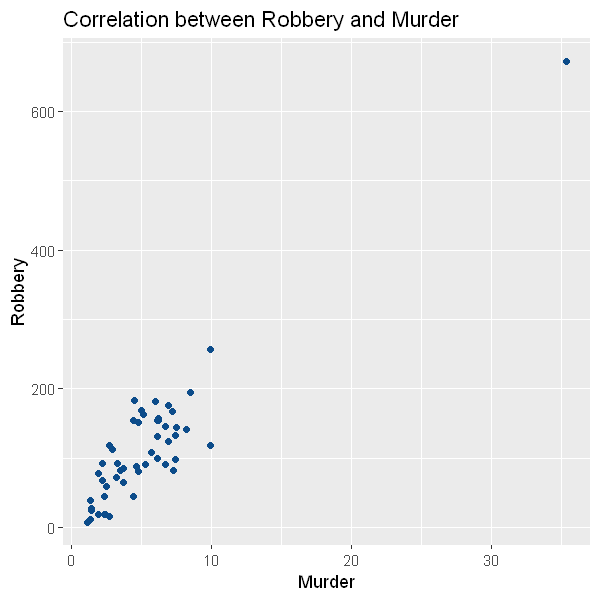

In [32]:
# Format graph size
options(repr.plot.width = 5, repr.plot.height = 5)

# Plot
ggplot2::ggplot(data = crimerate_states) +
  ggplot2::aes(x = murder, y = robbery) +
  ggplot2::geom_point(color = "#0c4c8a") +
  ggplot2::labs(title = "Correlation between Robbery and Murder",
       x = "Murder",
       y = "Robbery") +
  ggplot2::theme_grey()

### Plot 2: Create bubble plot

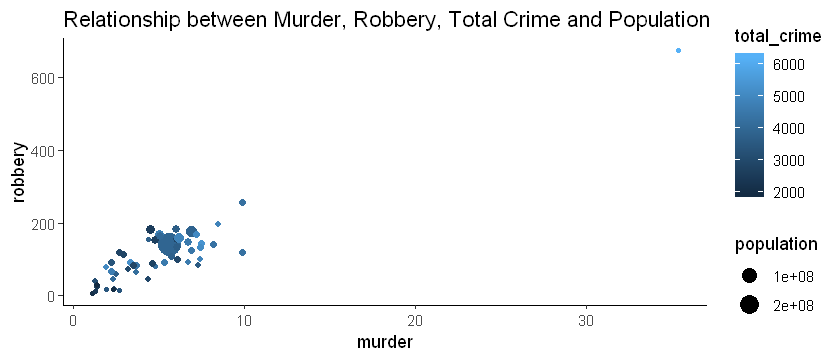

In [44]:
# Format graph size
options(repr.plot.width = 7, repr.plot.height = 3)

# Plot
ggplot2::ggplot(data = crimerate) +
  ggplot2::aes(x = murder, y = robbery, color = total_crime, size = population) +
  ggplot2::geom_point() +
  ggplot2::labs(title = "Relationship between Murder, Robbery, Total Crime and Population") +
  ggplot2::theme_classic()

### Plot 3: Create density plot

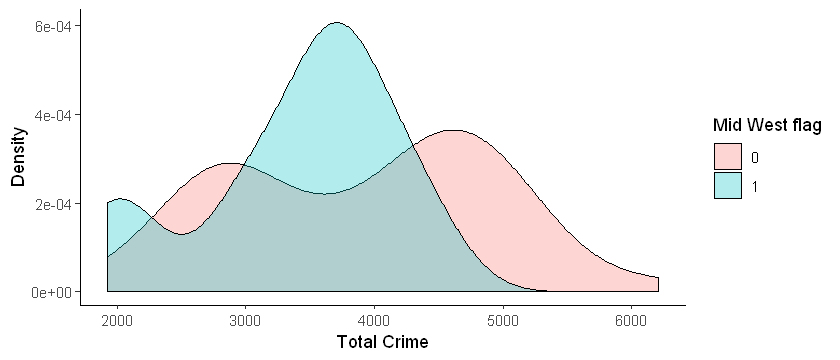

In [46]:
# For this I want to compare total crime rate of mid west states to the rest of the states
crimerate_compare <- crimerate_states[,-1]
rownames(crimerate_compare) <- crimerate_states[,1]

ggplot2::ggplot(crimerate_compare) +
  ggplot2::aes(total_crime, fill=as.factor(crimerate_compare$midwest)) +
  ggplot2::geom_density(alpha = 0.3) +
  ggplot2::labs(x='Total Crime', y='Density') +
  ggplot2::theme_classic() +
  ggplot2::guides(fill=ggplot2::guide_legend(title="Mid West flag"))

**End of Code**